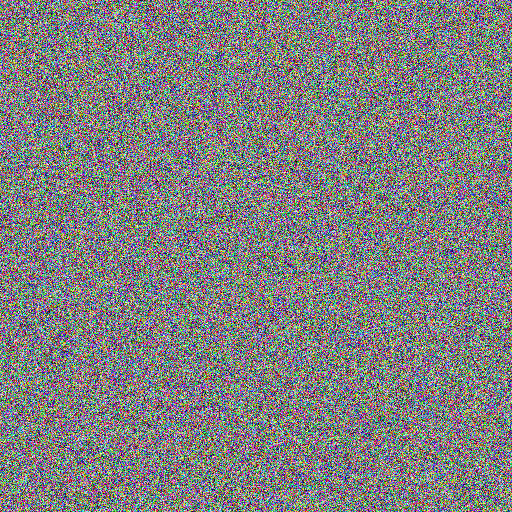

In [3]:
from PIL import Image
import numpy as np
import hashlib

def hash_to_color(hash_value):
    # Use the hash value to generate RGB color values
    r = int(hash_value[:2], 16)
    g = int(hash_value[2:4], 16)
    b = int(hash_value[4:6], 16)
    return (r, g, b)

def generate_image_from_hash(hash_str, image_size=(512, 512)):
    # Create a NumPy array to represent the image
    image_array = np.zeros((image_size[1], image_size[0], 3), dtype=np.uint8)

    # Fill the image array with color based on the hash
    for y in range(image_size[1]):
        for x in range(image_size[0]):
            pixel_hash = hashlib.sha256(f"{x},{y},{hash_str}".encode()).hexdigest()
            color = hash_to_color(pixel_hash)
            image_array[y, x, :] = color

    # Convert the NumPy array to a Pillow image
    image = Image.fromarray(image_array)

    return image

# Example: Generate an image based on a hash
hash_value = hashlib.sha256("asdffff".encode()).hexdigest()
image = generate_image_from_hash(hash_value)
image


/tmp/ipykernel_25769/1370750391.py:23: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -7 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image_array[y, x] = int(255 * (intensity * noise_val))
/tmp/ipykernel_25769/1370750391.py:23: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -31 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image_array[y, x] = int(255 * (intensity * noise_val))
/tmp/ipykernel_25769/1370750391.py:23: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -15 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(va

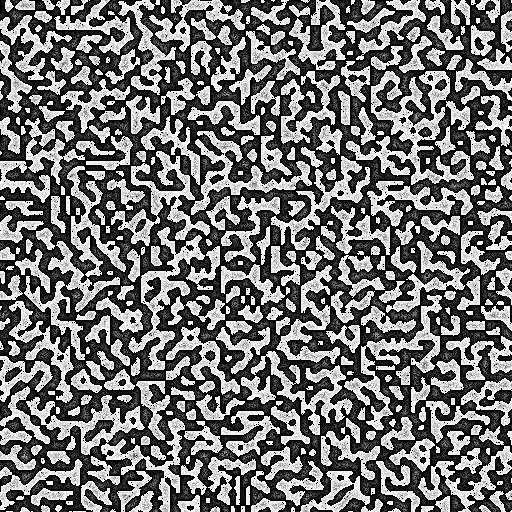

In [7]:
import noise
import hashlib
from PIL import Image
import numpy as np

def hash_to_float(hash_str):
    # Convert the hash to a float value between 0 and 1
    return int(hash_str, 16) / (16**len(hash_str))

def generate_image_from_hash(hash_str, image_size=(512, 512)):
    # Create a NumPy array to represent the image
    image_array = np.zeros((image_size[1], image_size[0]), dtype=np.uint8)

    for y in range(image_size[1]):
        for x in range(image_size[0]):
            # Use the hash to determine the intensity of the shape
            intensity = hash_to_float(hashlib.sha256(f"{x},{y},{hash_str}".encode()).hexdigest())

            # Use Perlin noise to generate a smooth pattern
            noise_val = noise.pnoise2(x / 10.0, y / 10.0)

            # Set pixel intensity based on the combination of hash and noise
            image_array[y, x] = int(255 * (intensity * noise_val))

    # Convert the NumPy array to a Pillow image
    image = Image.fromarray(image_array)

    return image

# Example: Generate an image based on a hash
hash_value = hashlib.sha256("asdffff".encode()).hexdigest()
image = generate_image_from_hash(hash_value)
image


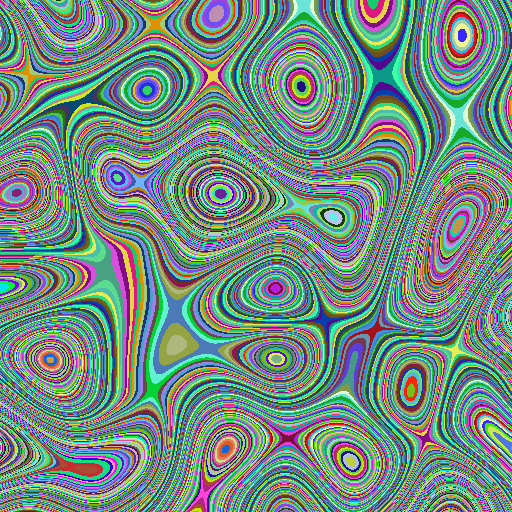

In [11]:
import numpy as np
from PIL import Image

def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3

    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    gradients = 2*np.random.random((res[0]+1, res[1]+1,2)) - 1
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:, 1:].repeat(d[0], 0).repeat(d[1], 1)
    n00 = np.sum(grid * g00, 2)
    n10 = np.sum(np.stack([grid[..., 0] - 1, grid[..., 1]], 2) * g10, 2)
    n01 = np.sum(np.stack([grid[..., 0], grid[..., 1] - 1], 2) * g01, 2)
    n11 = np.sum(np.stack([grid[..., 0] - 1, grid[..., 1] - 1], 2) * g11, 2)
    t = f(grid)
    n0 = n00*(1-t[..., 0]) + t[..., 0]*n10
    n1 = n01*(1-t[..., 0]) + t[..., 0]*n11
    return np.sqrt(2)*((1-t[..., 1])*n0 + t[..., 1]*n1)

def generate_image(shape=(512, 512), res=(4, 4)):
    # Generate 2D Perlin noise
    perlin_noise = generate_perlin_noise_2d(shape, res)

    # Normalize to [0, 255]
    normalized_noise = (perlin_noise - np.min(perlin_noise)) / (np.max(perlin_noise) - np.min(perlin_noise))
    image_array = (normalized_noise * 255).astype(np.uint8)

    # Generate a random color map
    color_map = np.random.randint(0, 255, (3, 256)).T
    colored_image = color_map[image_array]

    # Convert the NumPy array to a uint8 array
    colored_image = colored_image.astype(np.uint8)

    # Convert the NumPy array to a Pillow image
    image = Image.fromarray(colored_image)

    return image

# Example: Generate an image
image = generate_image()
image

/tmp/ipykernel_25769/1954156282.py:12: RankWarning: Polyfit may be poorly conditioned
  y = np.poly1d(np.polyfit(x, y, 20))(x)


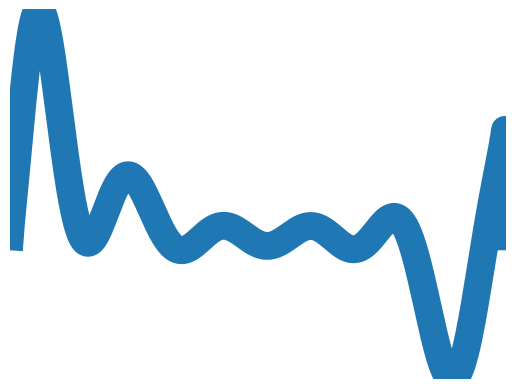

In [58]:
# use noise library to create 1d perlin noise
import noise
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def generate_image(shape=(512, 512), res=(4, 4)):
    x = np.linspace(0, shape[0]//20, num=shape[0])
    # perlin noise = y level
    y = [noise.pnoise1(i/res[0], repeat=shape[1]) for i in x]
    # smooth y by approximating it with a polynomial
    y = np.poly1d(np.polyfit(x, y, 20))(x)
    y[0] = 0
    y[-1] = 0

    # set plot padding to 0
    plt.tight_layout(pad=0)
    plt.xlim(min(x), max(x))
    plt.ylim(min(y), max(y))
    # plot x, y without 
    plt.axis('off')
    # thick linewidth
    plt.plot(x, y, linewidth=20)
    # export as image
    plt.savefig('test.png', bbox_inches='tight', pad_inches=0)

generate_image()

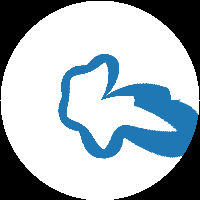

In [60]:
import math as m
from PIL import Image

Ro = 100.0
Ri = 0

# img = [[1 for x in range(int(width))] for y in range(int(height))]
cir = [[0 for x in range(int(Ro * 2))] for y in range(int(Ro * 2))]

# image = Image.open('0vWEI.png')
image = Image.open('test.png')
# data = image.convert('RGB')
pixels = image.load()
width, height = image.size

def shom_im(img):  # for showing data as image
    list_image = [item for sublist in img for item in sublist]
    new_image = Image.new("RGB", (len(img[0]), len(img)))
    new_image.putdata(list_image)
    new_image.save("result1.png","PNG")
    return new_image


for i in range(int(Ro)):
    # outer_radius = Ro*m.cos(m.asin(i/Ro))
    outer_radius = m.sqrt(Ro*Ro - i*i)
    for j in range(-int(outer_radius),int(outer_radius)):
        if i < Ri:
            # inner_radius = Ri*m.cos(m.asin(i/Ri))
            inner_radius = m.sqrt(Ri*Ri - i*i)
        else:
            inner_radius = -1
        if j < -inner_radius or j > inner_radius:
            # this is the destination
            # solid:
            # cir[int(Ro-i)][int(Ro+j)] = (255,255,255)
            # cir[int(Ro+i)][int(Ro+j)] = (255,255,255)
            # textured:

            x = Ro+j
            y = Ro-i
            # calculate source
            angle = m.atan2(y-Ro,x-Ro)/2
            distance = m.sqrt((y-Ro)*(y-Ro) + (x-Ro)*(x-Ro))
            distance = m.floor((distance-Ri+1)*(height-1)/(Ro-Ri))
        #   if distance >= height:
        #       distance = height-1
            cir[int(y)][int(x)] = pixels[int(width*angle/m.pi) % width, height-distance-1]
            y = Ro+i
            # calculate source
            angle = m.atan2(y-Ro,x-Ro)/2
            distance = m.sqrt((y-Ro)*(y-Ro) + (x-Ro)*(x-Ro))
            distance = m.floor((distance-Ri+1)*(height-1)/(Ro-Ri))
        #   if distance >= height:
        #       distance = height-1
            cir[int(y)][int(x)] = pixels[int(width*angle/m.pi) % width, height-distance-1]

shom_im(cir)